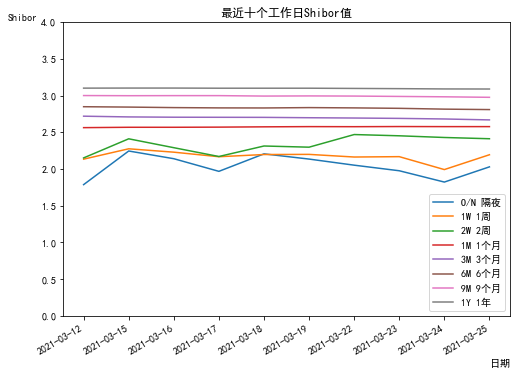

In [2]:
import requests
from bs4 import BeautifulSoup       # pip install beautifulsoup4
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']      
plt.rcParams['axes.unicode_minus'] = False      

url = "http://www.shibor.org/shibor/ShiborTendaysShow.do"
res = requests.get(url)

# print(res.status_code)
# print(res.text)

soup = BeautifulSoup(res.text, "lxml")

infoTitleS = soup.find_all('td', attrs={'class':'infoTitleS'})          
typeList = []
for i in range(len(infoTitleS)):
    if i != 0:
        typeList.append(infoTitleS[i].text)

table = soup.find('table', attrs={'class':'shiborquxian2'})    
tds = table.find_all('td')
x = []
y1 = []; y2 = []; y3 = []; y4 = []; y5 = []; y6 = []; y7 = []; y8 = []
for i in range(len(tds)):    
    n = i%9
    if n == 0:
        x.append(tds[i].text)    
    elif n == 1:
        y1.append(float(tds[i].text))    
    elif n == 2:
        y2.append(float(tds[i].text))
    elif n == 3:
        y3.append(float(tds[i].text))  
    elif n == 4:
        y4.append(float(tds[i].text))   
    elif n == 5:
        y5.append(float(tds[i].text))  
    elif n == 6:
        y6.append(float(tds[i].text))  
    elif n == 7:
        y7.append(float(tds[i].text))  
    elif n == 8:
        y8.append(float(tds[i].text))  


fig=plt.figure(figsize=(8,6))
# print(fig)

#y值不能是字符串类型 否则将按字符串排序
plt.plot(x[::-1],y1[::-1],label=typeList[0]+" 隔夜")
plt.plot(x[::-1],y2[::-1],label=typeList[1]+" 1周")
plt.plot(x[::-1],y3[::-1],label=typeList[2]+" 2周")
plt.plot(x[::-1],y4[::-1],label=typeList[3]+" 1个月")
plt.plot(x[::-1],y5[::-1],label=typeList[4]+" 3个月")
plt.plot(x[::-1],y6[::-1],label=typeList[5]+" 6个月")
plt.plot(x[::-1],y7[::-1],label=typeList[6]+" 9个月")
plt.plot(x[::-1],y8[::-1],label=typeList[7]+" 1年")

plt.title("最近十个工作日Shibor值")
plt.xlabel("日期", loc = "right")
plt.ylabel("Shibor", loc = "top", rotation = 0)
plt.ylim(0, 4)
plt.legend(loc='lower right')
# plt.legend(bbox_to_anchor=(1,0), loc = 3, borderaxespad=0)
# plt.subplots_adjust(wspace =10, hspace =0)

#x轴标注自动调整
fig.autofmt_xdate()

# ax = plt.gca()
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')

plt.show()